In [48]:
#Please ensure that you have the yfinance library installed 
#We can use yahoo finace api in this way
#!pip install yfinance

[*********************100%***********************]  2 of 2 completed


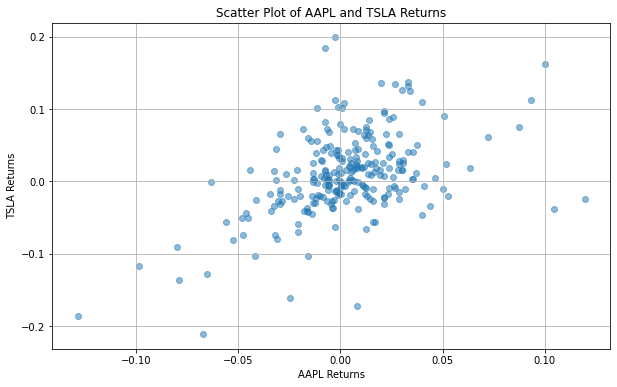

In [59]:
#1-)Scattering Returns of Two Stocks
import yfinance as yf
import matplotlib.pyplot as plt

def scatter_stock_returns(stock_symbol1, stock_symbol2, start_date, end_date):
    """
    Plots the scatter plot of returns for two stocks.
    
    Parameters:
    stock_symbol1 (str): Symbol of the first stock.
    stock_symbol2 (str): Symbol of the second stock.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download([stock_symbol1, stock_symbol2], start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change()

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(returns[stock_symbol1], returns[stock_symbol2], alpha=0.5)
    plt.title(f'Scatter Plot of {stock_symbol1} and {stock_symbol2} Returns')
    plt.xlabel(f'{stock_symbol1} Returns')
    plt.ylabel(f'{stock_symbol2} Returns')
    plt.grid(True)
    plt.show()

# Example usage
stock1 = 'AAPL'
stock2 = 'TSLA'
start_date = '2020-01-01'
end_date = '2021-01-01'
scatter_stock_returns(stock1, stock2, start_date, end_date)


[*********************100%***********************]  2 of 2 completed


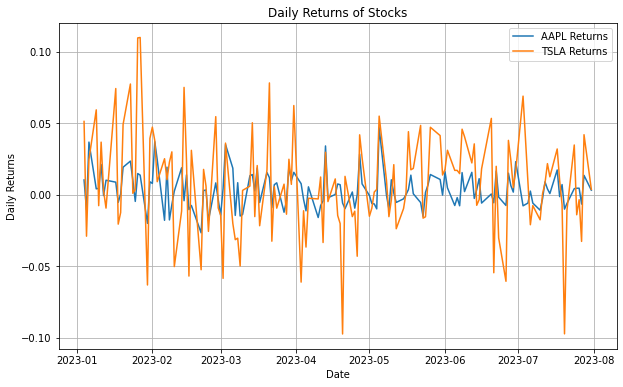

In [60]:
#2-)Plotting Returns of Two Stocks
import yfinance as yf
import matplotlib.pyplot as plt

def plot_daily_returns(stocks, start_date, end_date):
    """
    Scatters the daily returns of multiple stocks.
    
    Parameters:
    stocks (list): List of stock symbols.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change()

    # Plot daily returns
    plt.figure(figsize=(10, 6))
    
    for stock in stocks:
        plt.plot(returns.index, returns[stock], label=f'{stock} Returns')

    plt.title('Daily Returns of Stocks')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
stocks_to_plot = ['AAPL', 'TSLA']  # You can add more stock symbols
start_date = '2023-01-01'
end_date = '2023-08-01'
plot_daily_returns(stocks_to_plot, start_date, end_date)


[*********************100%***********************]  3 of 3 completed


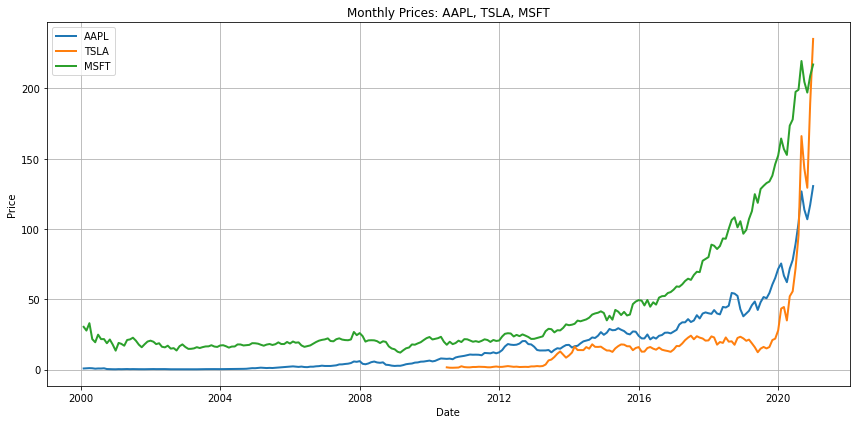

In [61]:
#3-)Plotting Prices of Stocks
import yfinance as yf
import matplotlib.pyplot as plt

def plot_stock_prices(symbols, start_date, end_date):
    """
    Plots the actual monthly prices of stocks.
    
    Parameters:
    symbols (list): List of stock symbols.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

    # Resample to monthly data
    monthly_data = data.resample('M').last()

    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for symbol in symbols:
        plt.plot(monthly_data.index, monthly_data[symbol], label=symbol, linewidth=2)

    plt.title('Monthly Prices: {}'.format(', '.join(symbols)))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
stocks_to_plot = ['AAPL', 'TSLA', 'MSFT']  # You can add more stock symbols
start_date = '2000-01-01'
end_date = '2021-01-01'
plot_stock_prices(stocks_to_plot, start_date, end_date)


[*********************100%***********************]  4 of 4 completed


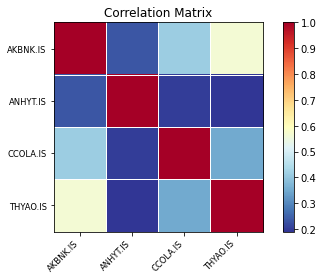

In [1]:
#4-)Plotting Correlation Matrix of Stocks
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_correlation_matrix(symbols, start_date, end_date):
    """
    Plots the covariance matrix of stocks.
    
    Parameters:
    symbols (list): List of stock symbols.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Calculate correlation matrix
    cor_matrix = returns.corr()

    
    sm.graphics.plot_corr(cor_matrix, xnames=list(returns.columns))
# Example usage
stocks_to_plot = ['AKBNK.IS', 'THYAO.IS', 'ANHYT.IS','CCOLA.IS']  # You can add more stock symbols
start_date = '2015-01-01'
end_date = '2021-01-01'
plot_correlation_matrix(stocks_to_plot, start_date, end_date)


[*********************100%***********************]  4 of 4 completed


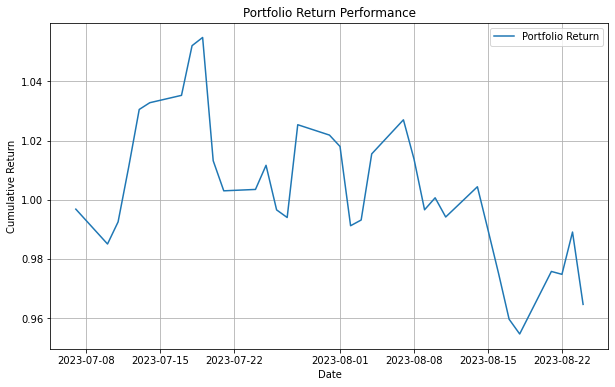

In [2]:
#5-) Analyzing A Portfolio

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def plot_portfolio_return(stocks, weights, start_date, end_date):
    """
    Plots the return performance of a portfolio composed of multiple stocks with given weights.
    
    Parameters:
    stocks (list): List of stock symbols.
    weights (list): List of weights corresponding to the stocks.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Calculate portfolio daily returns based on weights
    portfolio_returns = (returns * weights).sum(axis=1)

    # Calculate cumulative returns
    cumulative_returns = (1 + portfolio_returns).cumprod()

    # Plot the portfolio return performance
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Return')
    plt.title('Portfolio Return Performance')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
stocks = ['META', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]
start_date = '2023-07-06'
end_date = '2023-08-25'
plot_portfolio_return(stocks, weights, start_date, end_date)



[*********************100%***********************]  4 of 4 completed


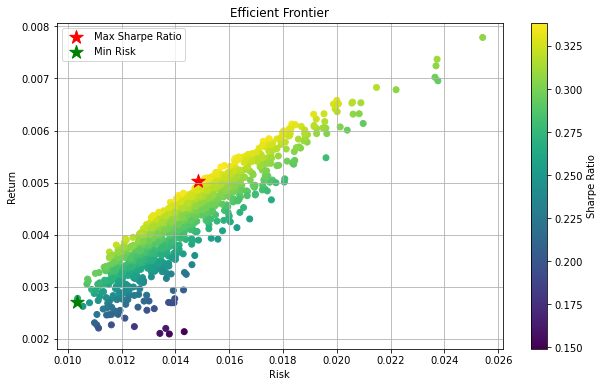

In [3]:
# 6-) Drawing Efficient Frontier
import yfinance as yf
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import pandas as pd

def efficient_frontier(stocks, start_date, end_date):
    """
    Plots the efficient frontier for a given set of stocks.
    
    Parameters:
    stocks (list): List of stock symbols.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Calculate mean returns and covariance matrix
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    # Number of assets
    num_assets = len(stocks)

    # Number of portfolios to simulate
    num_portfolios = 1000

    # Initialize arrays to store results
    results = np.zeros((3, num_portfolios))

    # Simulate portfolios
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        portfolio_return = np.sum(weights * mean_returns)
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        results[0, i] = portfolio_return
        results[1, i] = portfolio_stddev
        results[2, i] = portfolio_return / portfolio_stddev

    # Convert results array to DataFrame
    results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe'])

    # Find portfolio with highest Sharpe ratio
    max_sharpe_idx = results_df['Sharpe'].idxmax()

    # Find portfolio with minimum risk
    min_risk_idx = results_df['Risk'].idxmin()

    # Plot the efficient frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(results_df.loc[max_sharpe_idx, 'Risk'], results_df.loc[max_sharpe_idx, 'Return'], marker='*', color='r', s=200, label='Max Sharpe Ratio')
    plt.scatter(results_df.loc[min_risk_idx, 'Risk'], results_df.loc[min_risk_idx, 'Return'], marker='*', color='g', s=200, label='Min Risk')
    plt.title('Efficient Frontier')
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
start_date = '2023-05-01'
end_date = '2023-08-01'
efficient_frontier(stocks, start_date, end_date)


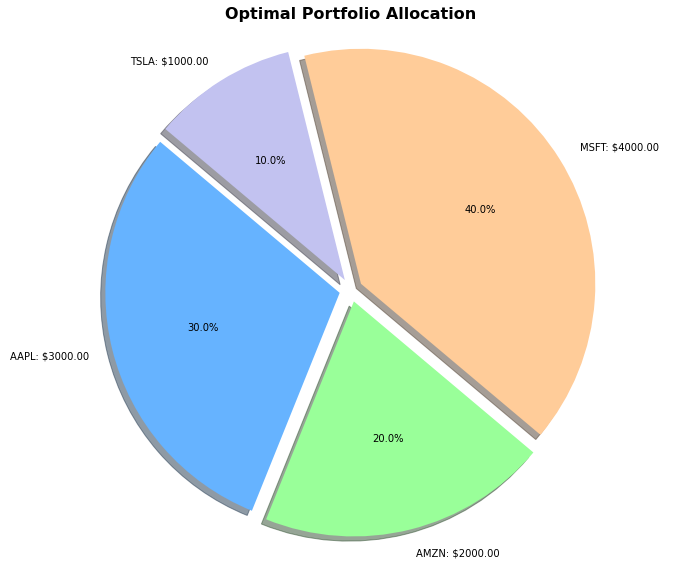

In [4]:

# 7-) Plotting the Pie Chart for Optimal Portfolio Allocation
import matplotlib.pyplot as plt

def optimal_portfolio(stocks, optimal_weights, initial_investment):
    """
    Visualizes the optimal portfolio allocation in a fancier pie chart, showing the actual investment in money for each stock.
    
    Parameters:
    stocks (list): List of stock symbols.
    optimal_weights (list): List of optimal weights for each stock.
    initial_investment (float): Initial investment amount.
    """
    investment_amounts = [weight * initial_investment for weight in optimal_weights]

    # Create labels with investment amounts
    labels = [f'{stock}: ${amount:.2f}' for stock, amount in zip(stocks, investment_amounts)]

    # Define custom colors for the slices
    colors = ['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

    plt.figure(figsize=(10, 8))
    plt.pie(investment_amounts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0.05, 0.05, 0.05))
    plt.title('Optimal Portfolio Allocation', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Example usage
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
optimal_weights = [0.3, 0.2, 0.4, 0.1]
initial_investment = 10000  # Example initial investment amount
optimal_portfolio(stocks, optimal_weights, initial_investment)
